<a href="https://colab.research.google.com/github/Dheerajthummala/Random_Forest/blob/main/Randomforest(companydata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [91]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [92]:
# as per given
cut=[0,5,9,16.5]
label=['min','medium','max']
data["sales_ratio"]=pd.cut(x=data['Sales'],bins=cut,labels=label,include_lowest=True)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_ratio
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,max
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,max
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,max
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,min
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,max
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,medium


In [93]:
# changing categorical data into numerical
from sklearn import preprocessing
data2=data.copy()
label_encoder = preprocessing.LabelEncoder()
data2['ShelveLoc']= label_encoder.fit_transform(data2['ShelveLoc'])
data2['sales_ratio']= label_encoder.fit_transform(data2['sales_ratio'])
data2['Urban']= label_encoder.fit_transform(data2['Urban'])
data2['US']= label_encoder.fit_transform(data2['US'])

In [94]:
data2.drop('Sales',axis=1,inplace=True)
data2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_ratio
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,2


In [95]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
 10  sales_ratio  400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


array([[<Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Advertising'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'ShelveLoc'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Urban'}>],
       [<Axes: title={'center': 'US'}>,
        <Axes: title={'center': 'sales_ratio'}>, <Axes: >]], dtype=object)

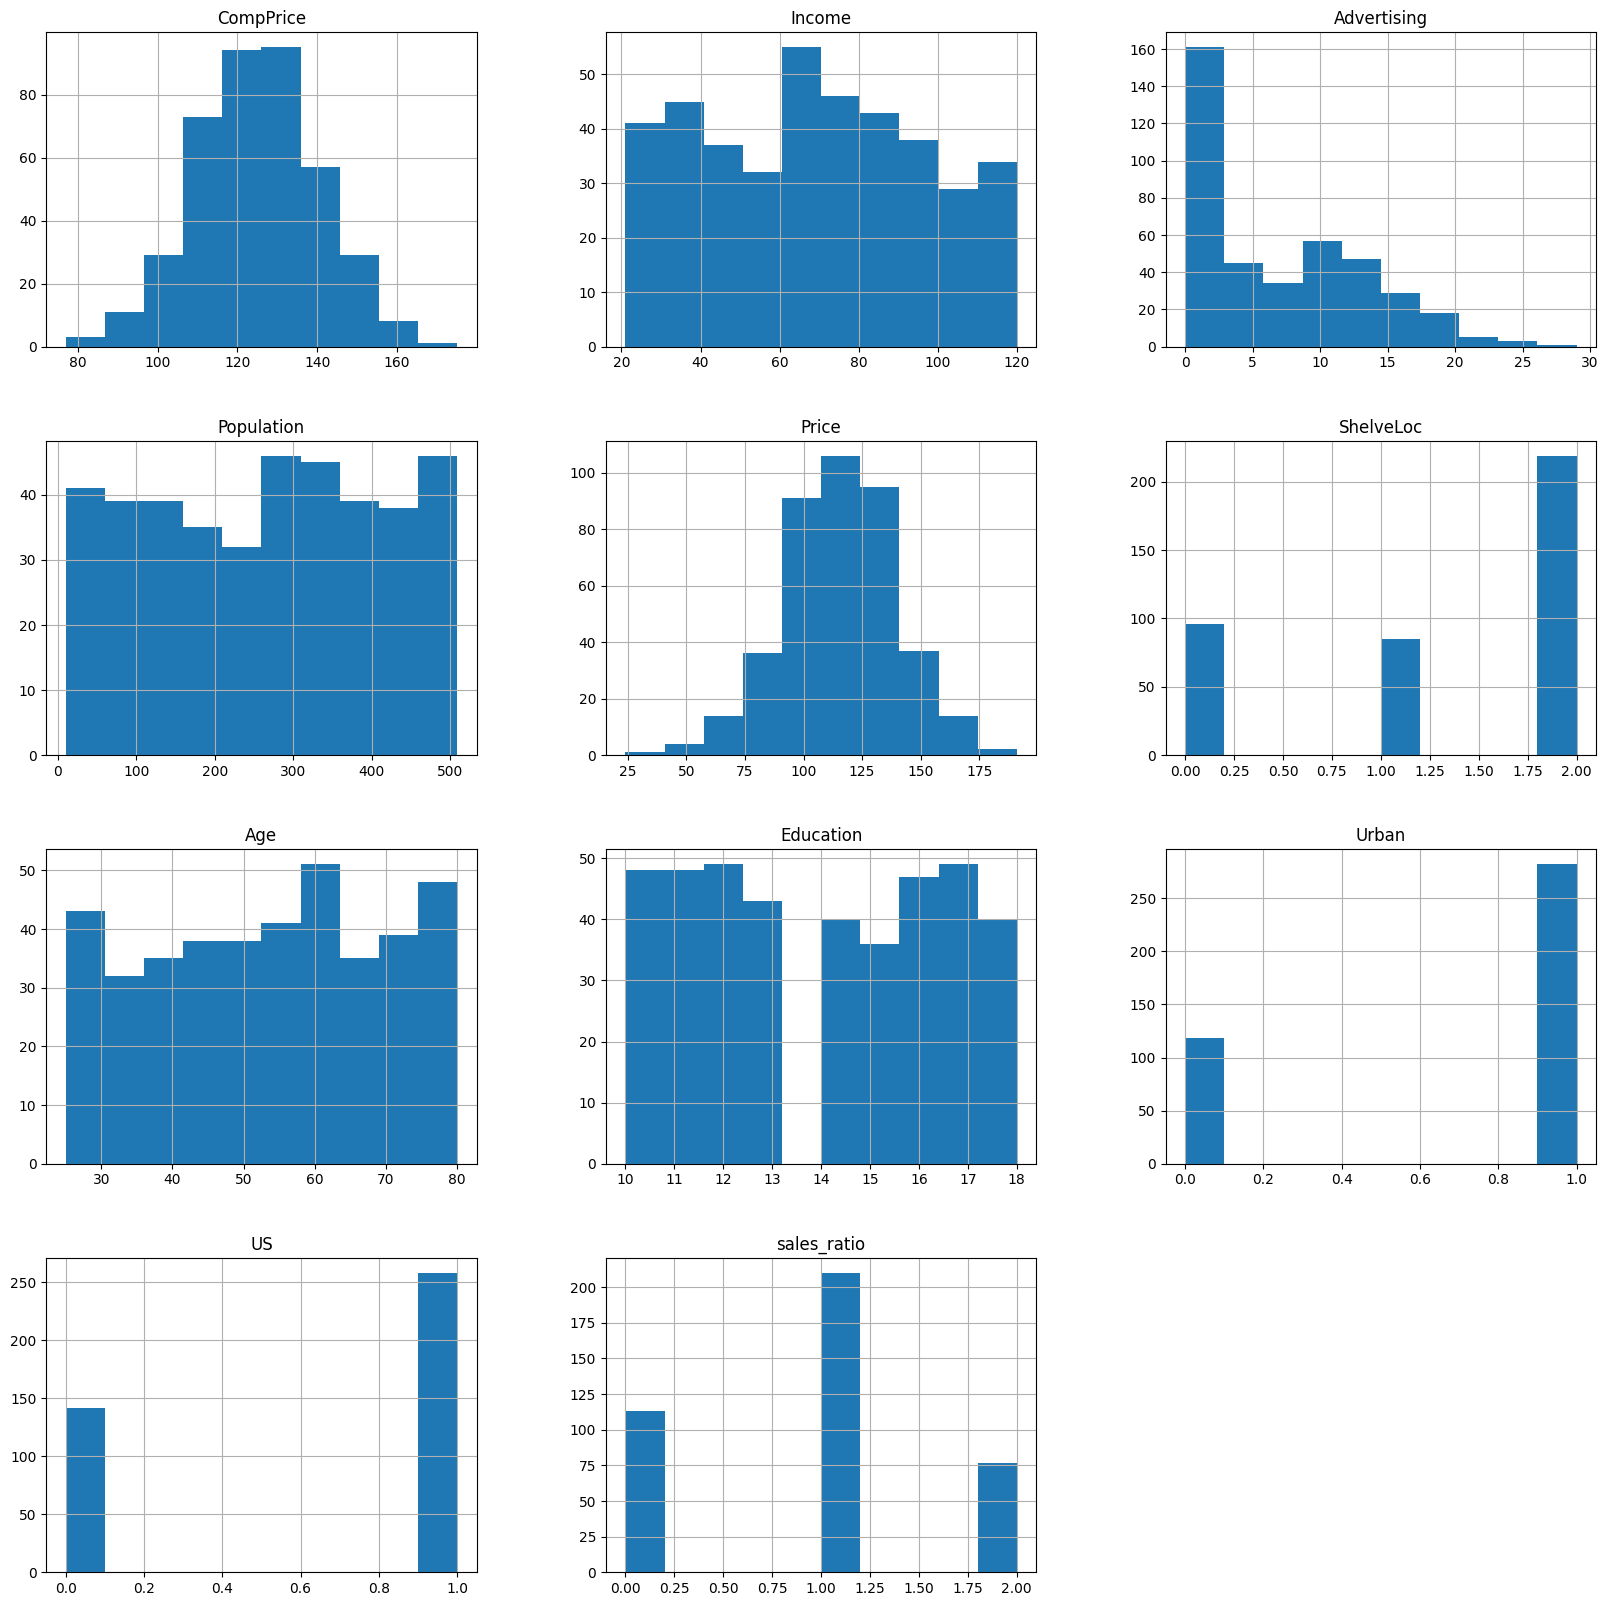

In [96]:
data2.hist(linewidth=1.2, figsize=(20, 20))

In [97]:
X=data2.iloc[:,0:10]
Y=data2.iloc[:,10]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [98]:
Y

0      0
1      0
2      0
3      1
4      2
      ..
395    0
396    1
397    1
398    1
399    0
Name: sales_ratio, Length: 400, dtype: int64

In [99]:
Y.value_counts()

1    210
0    113
2     77
Name: sales_ratio, dtype: int64

In [100]:
# bagging classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [101]:
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
des = DecisionTreeClassifier()
num = 100
model = BaggingClassifier(base_estimator=des, n_estimators=num, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6799999999999999


In [102]:
model.fit(X,Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [103]:
ensemble=pd.DataFrame()
ensemble['actual_y']=Y

In [104]:
y_bpred=model.predict(X)
ensemble['bagpred_y']=y_bpred
ensemble.head()

,actual_y,bagpred_y
0,0,0
1,0,0
2,0,0
3,1,1
4,2,2


In [105]:
# random forest classification
from sklearn.ensemble import RandomForestClassifier
max_features=3
model2 = RandomForestClassifier(n_estimators=num, max_features=max_features, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6799999999999999


In [106]:
model2.fit(X,Y)

RandomForestClassifier(max_features=3, random_state=42)

In [107]:
rand_y=model2.predict(X)

In [108]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [109]:
model3 = AdaBoostClassifier(n_estimators=num, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.6799999999999999


In [110]:
model3.fit(X,Y)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [111]:
ada_y=model3.predict(X)

In [112]:
ensemble["adaboost_predict"]=ada_y
ensemble["randaomforest_predict"]=rand_y
ensemble

,actual_y,bagpred_y,adaboost_predict,randaomforest_predict
0,0,0,1,0
1,0,0,0,0
2,0,0,1,0
3,1,1,1,1
4,2,2,1,2
...,...,...,...,...
395,0,0,0,0
396,1,1,1,1
397,1,1,1,1
398,1,1,1,1
